<a href="https://colab.research.google.com/github/deepskandpal/hands-on-machine-learning/blob/POC/TSNE-FOR%20VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
!pip install umap-learn
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     |████████████████████████████████| 69 kB 3.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67950 sha256=726c3309e0485d2e89126e13e0c7a836caeea47873fa04485458d1e0cad7c80b
  Stored in directory: /root/.cache/pip/wheels/22/ce/3d/75f6600b4d93c851021aceeec51b7b330c0ad4d9692e69be6a
Successfully built umap-learn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import files
files.upload()

Saving training_lifebuoy.dev_24_latest.csv to training_lifebuoy.dev_24_latest.csv


{'training_lifebuoy.dev_24_latest.csv': b'\xef\xbb\xbflabel,expression\r\naadaab,\xe0\xa4\x86\xe0\xa4\xa6\xe0\xa4\xbe\xe0\xa4\xac\r\naadaab,\xe0\xa4\x85\xe0\xa4\xa6\xe0\xa4\xac\r\naadaab,\xe0\xa4\x96\xe0\xa5\x81\xe0\xa4\xa6\xe0\xa4\xbe \xe0\xa4\xb9\xe0\xa4\xbe\xe0\xa5\x9e\xe0\xa4\xbf\xe0\xa5\x9b\r\naadaab,\xe0\xa4\xae\xe0\xa5\x88 \xe0\xa4\x86\xe0\xa4\xaa\xe0\xa4\x95\xe0\xa5\x8b \xe0\xa4\x86\xe0\xa4\xa6\xe0\xa4\xbe\xe0\xa4\xac \xe0\xa4\xac\xe0\xa5\x8b\xe0\xa4\xb2\xe0\xa4\xa4\xe0\xa4\xbe \xe0\xa4\xb9\xe0\xa5\x81\r\naadaab,\xe0\xa4\x86\xe0\xa4\xaa\xe0\xa4\x95\xe0\xa5\x8b \xe0\xa4\x86\xe0\xa4\xa6\xe0\xa4\xbe\xe0\xa4\xac\r\nabout_jio,\xe0\xa4\x95\xe0\xa5\x8d\xe0\xa4\xaf\xe0\xa4\xbe \xe0\xa4\x86\xe0\xa4\xaa \xe0\xa4\xae\xe0\xa5\x81\xe0\xa4\x9d\xe0\xa5\x87 \xe0\xa4\x9c\xe0\xa4\xbf\xe0\xa4\x93 \xe0\xa4\x95\xe0\xa5\x87 \xe0\xa4\xac\xe0\xa4\xbe\xe0\xa4\xb0\xe0\xa5\x87 \xe0\xa4\xae\xe0\xa5\x87\xe0\xa4\x82 \xe0\xa4\x95\xe0\xa5\x81\xe0\xa4\x9b \xe0\xa4\xac\xe0\xa4\xa4\xe0\xa4\xbe \xe0\xa4\xb8\xe0\x

In [2]:
training_data = pd.read_csv('training_lifebuoy.dev_24_latest.csv')

In [3]:
training_data.head()

label             expression
0  aadaab                   आदाब
1  aadaab                    अदब
2  aadaab             खुदा हाफ़िज़
3  aadaab  मै आपको आदाब बोलता हु
4  aadaab              आपको आदाब

In [4]:
training_data["label"].value_counts()

how_to_wash_hands            80
precautions_post_lockdown    55
symptoms_of_covid_19         43
corona_infection_in_pets     40
can_you_dance_for_me         39
                             ..
aadaab                        5
sastriakal                    5
good_afternoon                4
merry_christmas               3
happy_new_year                3
Name: label, Length: 200, dtype: int64

In [15]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
train, test = train_test_split(training_data, test_size=.30, random_state=43)
#Tag train set
tagged_tr = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[str(i)]) for i, _d in enumerate(train.expression)]
#Tag test set
tagged_test = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[str(i)]) for i, _d in enumerate(test.expression)]

In [16]:
model = Doc2Vec(vector_size=100,
                window=5, 
                alpha=.025, 
                min_alpha=0.00025, 
                min_count=2, 
                dm=1, 
                workers=8)
model.build_vocab(tagged_tr)

In [17]:
epochs = range(100)
for epoch in epochs:
    print(f'Epoch {epoch+1}')
    model.train(tagged_tr,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.00025
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
     
model.save('lifebuoy.model')

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])
y_train = train['label']

In [21]:
X_test = np.array([model.infer_vector(tagged_test[i][0]) for i in range(len(tagged_test))])
y_test = test['label']

In [22]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

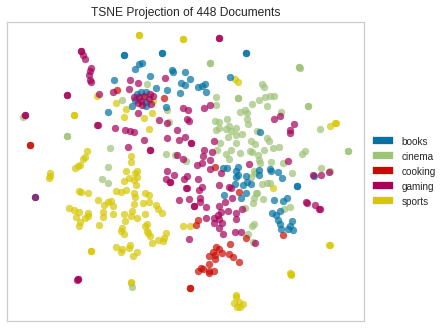

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target
labels = set(y)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(labels=labels)
tsne.fit_transform(X, y)
tsne.poof()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

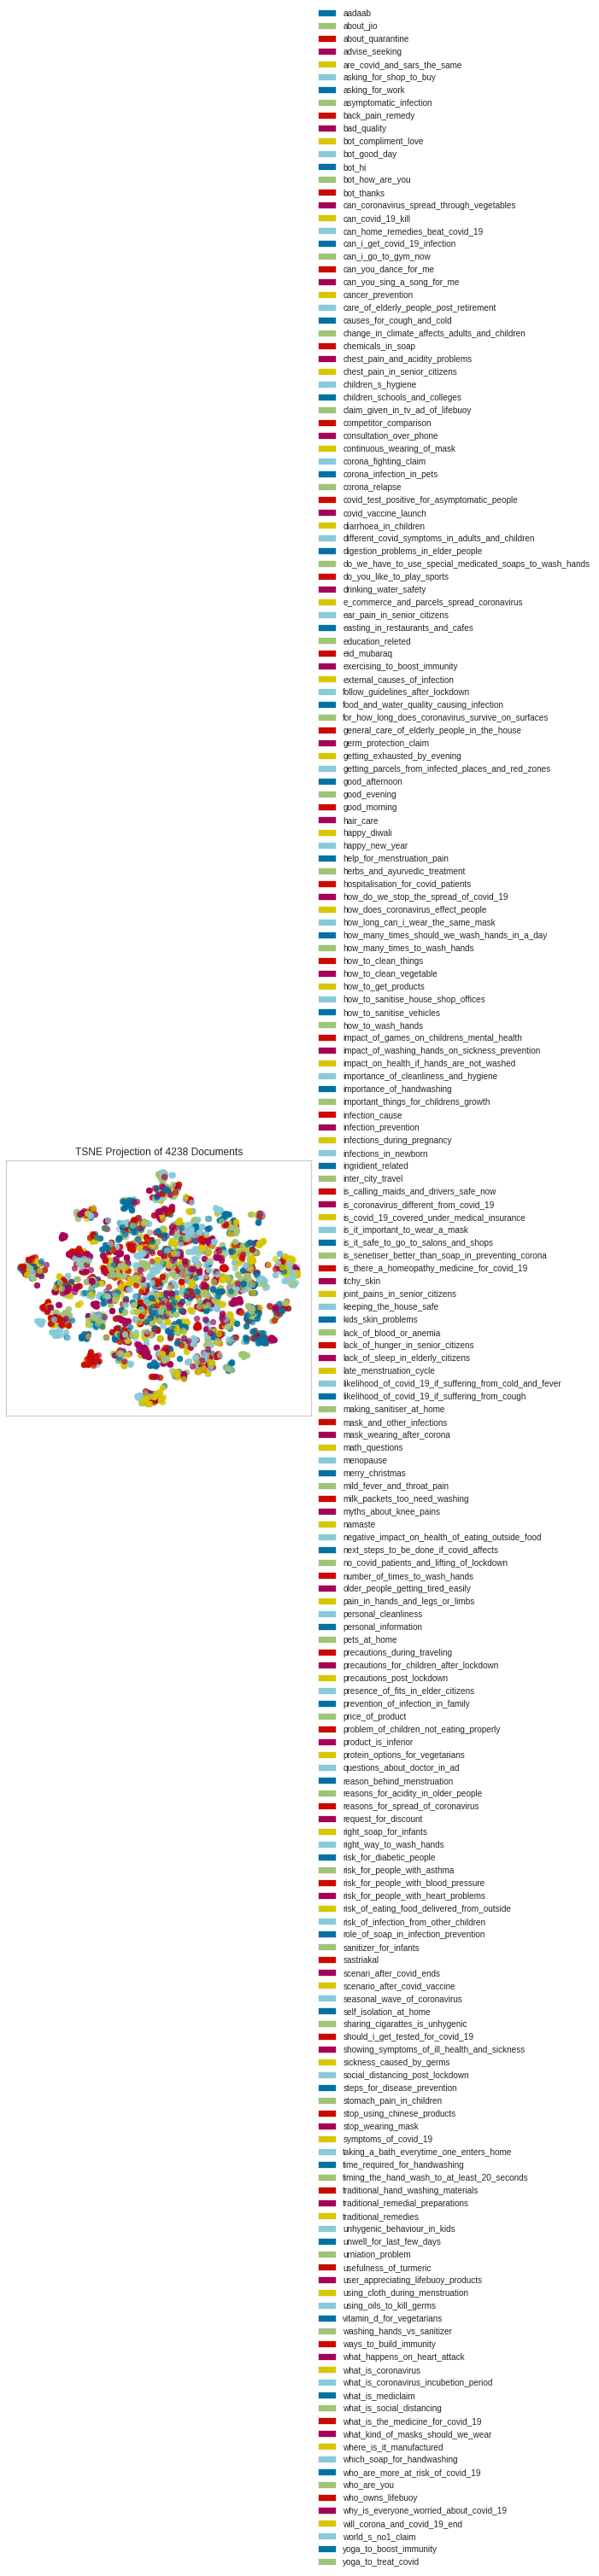

In [7]:
from yellowbrick.text.tsne import tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets import load_hobbies
from sklearn.manifold import TSNE
# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(training_data.expression)
y1 = training_data.label
labels = training_data.label.unique()
tsne = TSNEVisualizer(labels=labels)
tsne2 = TSNE()
tsne_results = tsne2.fit_transform(X) 
tsne.fit_transform(X, y1)
tsne.poof()

In [10]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh s'
                  '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.15, or '!bash rapidsai-csp-utils/colab/rapids-colab.sh nightly', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh n'
Enjoy using RAPIDS!  

In [8]:
!pip install plotly

In [12]:
import cuml
from cuml.manifold import TSNE, UMAP
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib
%matplotlib inline

In [13]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/4'
embed = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')
encodings = embed(training_data.expression)['outputs'].numpy()

In [14]:
# from sklearn.manifold import TSNE
tsne2d = TSNE(n_components=2)
projections_2d = tsne2d.fit_transform(encodings)

In [15]:
labels = training_data.label.unique()
fig = px.scatter(
    x=projections_2d[:, 0], y=projections_2d[:, 1], 
    color=training_data.label, hover_name=training_data.expression, height=700
)
fig.show()